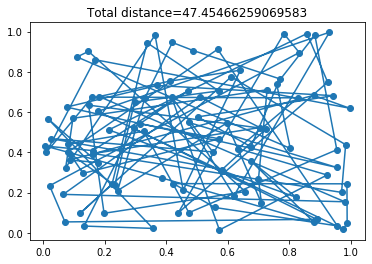

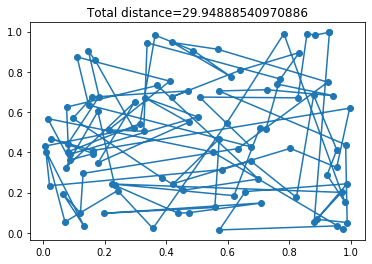

T=   0.20000 , distance=   29.94889 , accepted steps= 1001


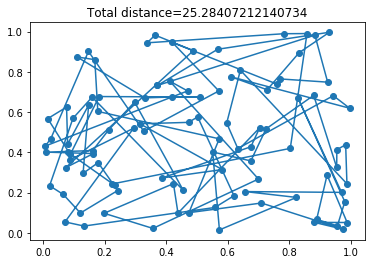

T=   0.18000 , distance=   25.28407 , accepted steps= 1001


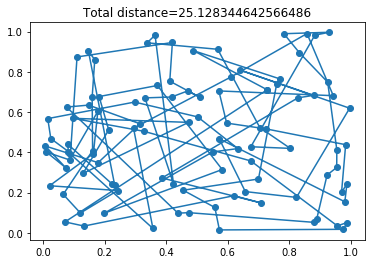

T=   0.16200 , distance=   25.12834 , accepted steps= 1001


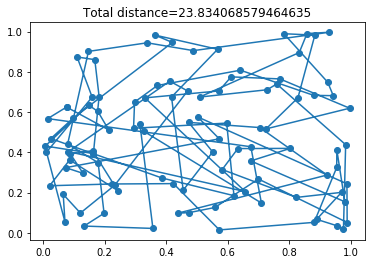

T=   0.14580 , distance=   23.83407 , accepted steps= 1001


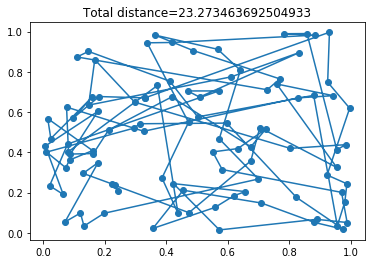

T=   0.13122 , distance=   23.27346 , accepted steps= 1001


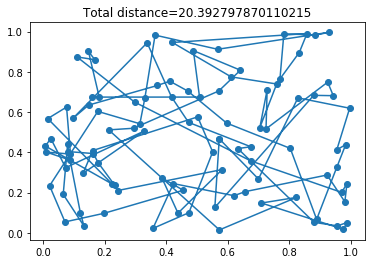

T=   0.11810 , distance=   20.39280 , accepted steps= 1001


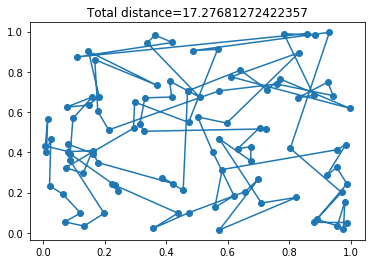

T=   0.10629 , distance=   17.27681 , accepted steps= 848


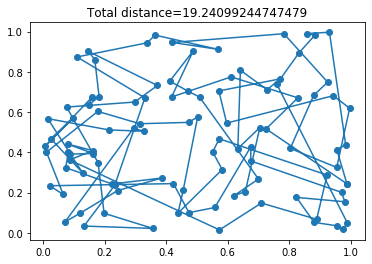

T=   0.09566 , distance=   19.24099 , accepted steps= 701


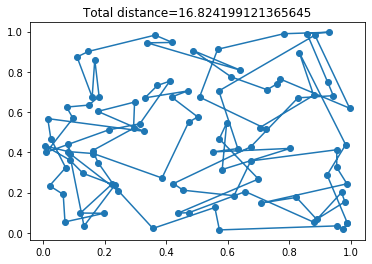

T=   0.08609 , distance=   16.82420 , accepted steps= 567


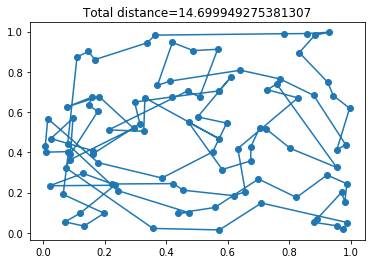

T=   0.07748 , distance=   14.69995 , accepted steps= 429


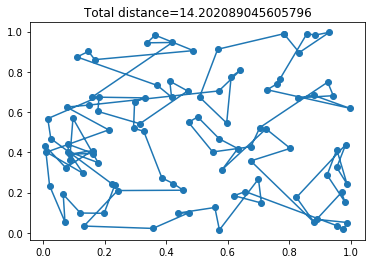

T=   0.06974 , distance=   14.20209 , accepted steps= 317


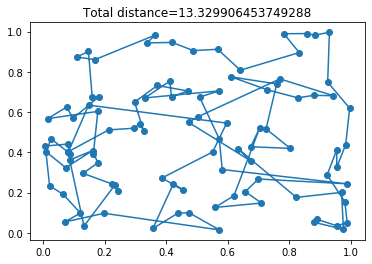

T=   0.06276 , distance=   13.32991 , accepted steps= 299


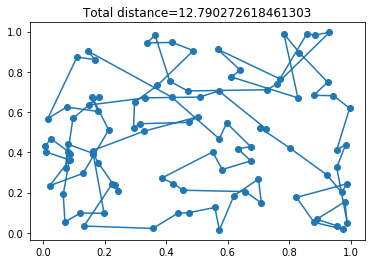

T=   0.05649 , distance=   12.79027 , accepted steps= 230


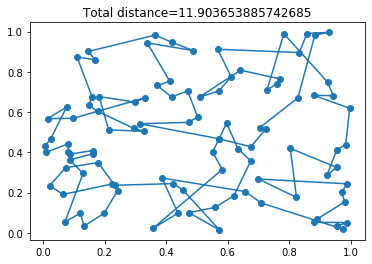

T=   0.05084 , distance=   11.90365 , accepted steps= 222


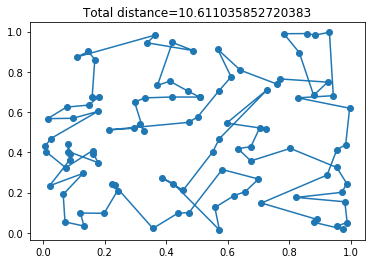

T=   0.04575 , distance=   10.61104 , accepted steps= 164


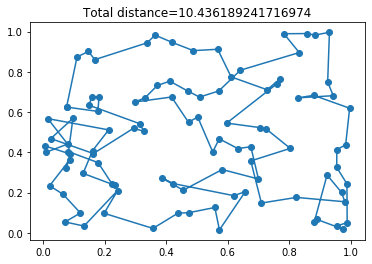

T=   0.04118 , distance=   10.43619 , accepted steps= 125


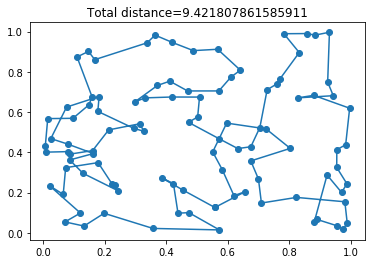

T=   0.03706 , distance=    9.42181 , accepted steps= 107


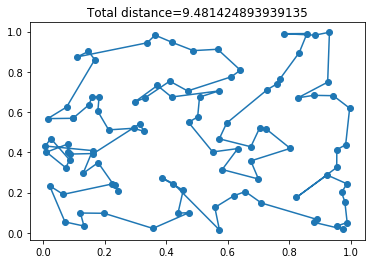

T=   0.03335 , distance=    9.48142 , accepted steps= 94


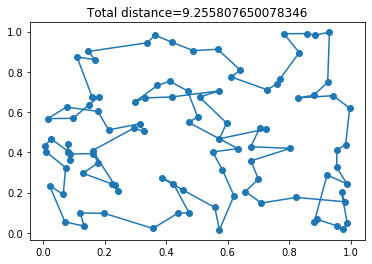

T=   0.03002 , distance=    9.25581 , accepted steps= 74


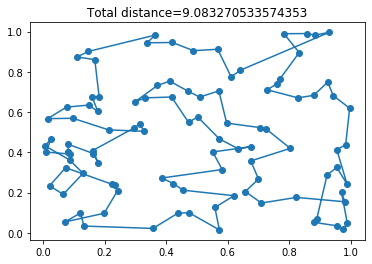

T=   0.02702 , distance=    9.08327 , accepted steps= 54


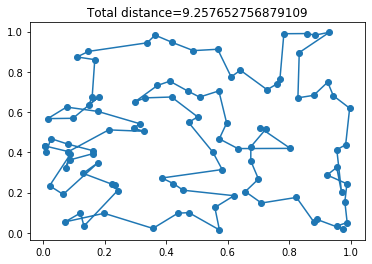

T=   0.02432 , distance=    9.25765 , accepted steps= 57


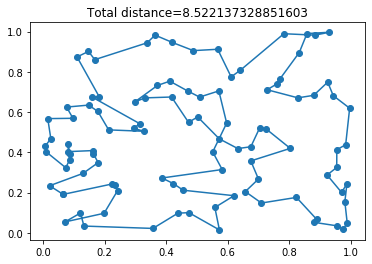

T=   0.02188 , distance=    8.52214 , accepted steps= 67


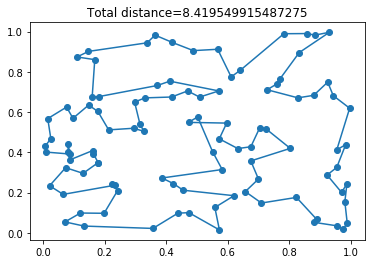

T=   0.01970 , distance=    8.41955 , accepted steps= 32


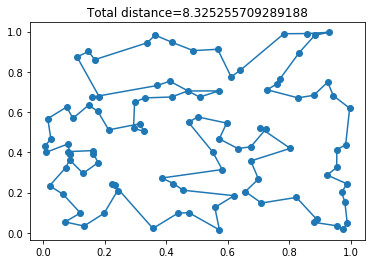

T=   0.01773 , distance=    8.32526 , accepted steps= 19


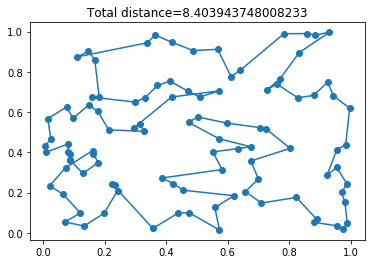

T=   0.01595 , distance=    8.40394 , accepted steps= 33


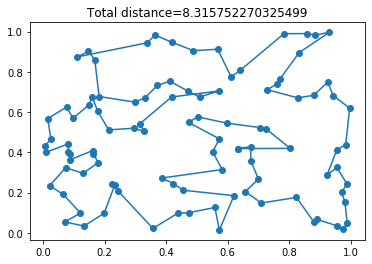

T=   0.01436 , distance=    8.31575 , accepted steps= 13


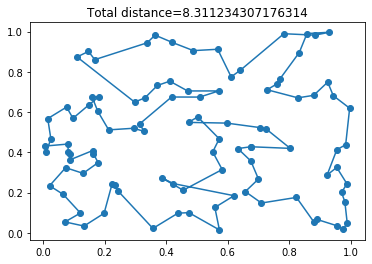

T=   0.01292 , distance=    8.31123 , accepted steps= 21


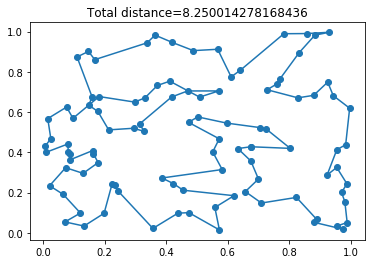

T=   0.01163 , distance=    8.25001 , accepted steps= 15


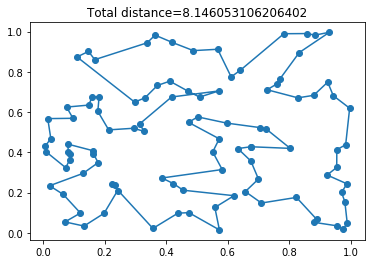

T=   0.01047 , distance=    8.14605 , accepted steps= 14


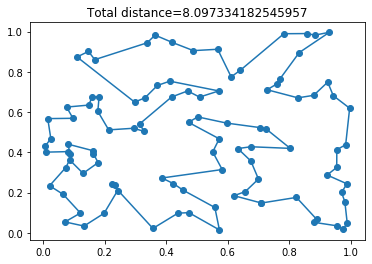

T=   0.00942 , distance=    8.09733 , accepted steps= 13


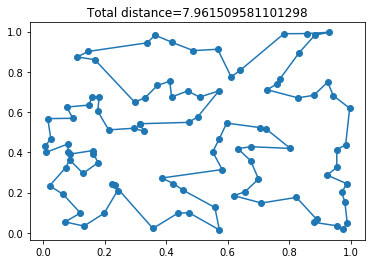

T=   0.00848 , distance=    7.96151 , accepted steps= 11


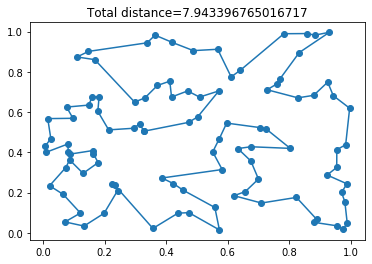

T=   0.00763 , distance=    7.94340 , accepted steps= 4


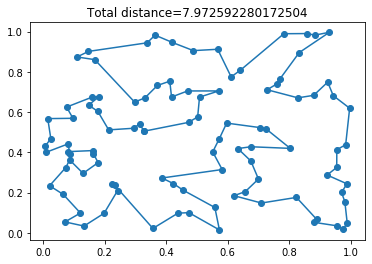

T=   0.00687 , distance=    7.97259 , accepted steps= 4


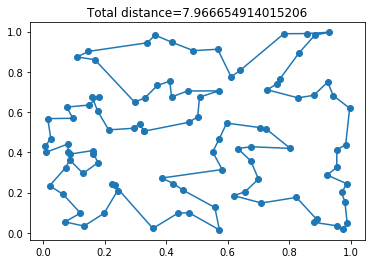

T=   0.00618 , distance=    7.96665 , accepted steps= 7


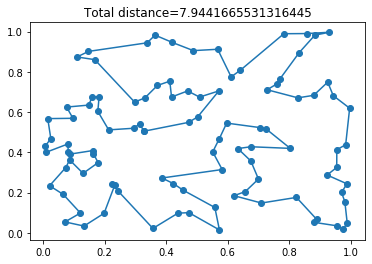

T=   0.00556 , distance=    7.94417 , accepted steps= 5


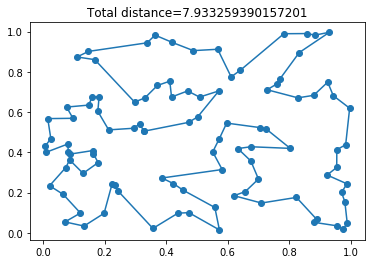

T=   0.00501 , distance=    7.93326 , accepted steps= 2


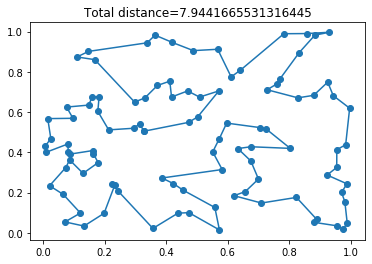

T=   0.00451 , distance=    7.94417 , accepted steps= 2


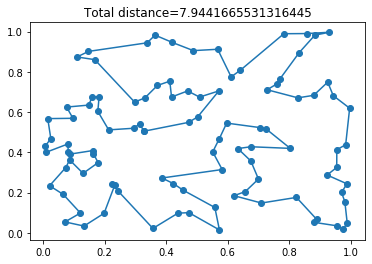

T=   0.00406 , distance=    7.94417 , accepted steps= 0


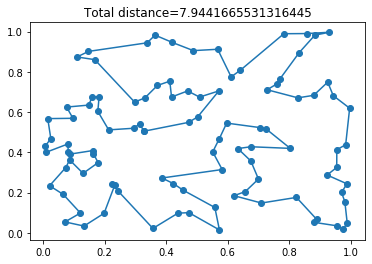

In [8]:

from scipy import *
from pylab import *
from numpy import *

def Distance(R1, R2):
    return sqrt((R1[0]-R2[0])**2+(R1[1]-R2[1])**2)

def TotalDistance(city, R):
    dist=0
    for i in range(len(city)-1):
        dist += Distance(R[city[i]],R[city[i+1]])
    dist += Distance(R[city[-1]],R[city[0]])
    return dist
    
def reverse(city, n):
    nct = len(city)
    nn = (1+ ((n[1]-n[0]) % nct))/2 # half the lenght of the segment to be reversed
    # the segment is reversed in the following way n[0]<->n[1], n[0]+1<->n[1]-1, n[0]+2<->n[1]-2,...
    # Start at the ends of the segment and swap pairs of cities, moving towards the center.
    for j in range(int(nn)):
        k = (n[0]+j) % nct
        l = (n[1]-j) % nct
        (city[k],city[l]) = (city[l],city[k])  # swap
    
def transpt(city, n):
    nct = len(city)
    
    newcity=[]
    # Segment in the range n[0]...n[1]
    for j in range( (n[1]-n[0])%nct + 1):
        newcity.append(city[ (j+n[0])%nct ])
    # is followed by segment n[5]...n[2]
    for j in range( (n[2]-n[5])%nct + 1):
        newcity.append(city[ (j+n[5])%nct ])
    # is followed by segment n[3]...n[4]
    for j in range( (n[4]-n[3])%nct + 1):
        newcity.append(city[ (j+n[3])%nct ])
    return newcity

def Plot(city, R, dist):
    # Plot
    Pt = [R[city[i]] for i in range(len(city))]
    Pt += [R[city[0]]]
    Pt = array(Pt)
    # title('Total distance='+str(dist))
    # plot(Pt[:,0], Pt[:,1], '-o')
    # show()

if __name__=='__main__':

    ncity = 100        # Number of cities to visit
    maxTsteps = 100    # Temperature is lowered not more than maxTsteps
    Tstart = 0.2       # Starting temperature - has to be high enough
    fCool = 0.9        # Factor to multiply temperature at each cooling step
    maxSteps = 100*ncity     # Number of steps at constant temperature
    maxAccepted = 10*ncity   # Number of accepted steps at constant temperature

    Preverse = 0.5      # How often to choose reverse/transpose trial move

    # Choosing city coordinates
    R=[]  # coordinates of cities are choosen randomly
    for i in range(ncity):
        R.append( [rand(),rand()] )
    R = array(R)

    # The index table -- the order the cities are visited.
    city = range(ncity)
    # Distance of the travel at the beginning
    dist = TotalDistance(city, R)

    # Stores points of a move
    n = zeros(6, dtype=int)
    nct = len(R) # number of cities
    
    T = Tstart # temperature

    Plot(city, R, dist)
    
    for t in range(maxTsteps):  # Over temperature

        accepted = 0
        for i in range(maxSteps): # At each temperature, many Monte Carlo steps
            
            while True: # Will find two random cities sufficiently close by
                # Two cities n[0] and n[1] are choosen at random
                n[0] = int((nct)*rand())     # select one city
                n[1] = int((nct-1)*rand())   # select another city, but not the same
                if (n[1] >= n[0]): n[1] += 1   #
                if (n[1] < n[0]): (n[0],n[1]) = (n[1],n[0]) # swap, because it must be: n[0]<n[1]
                nn = (n[0]+nct -n[1]-1) % nct  # number of cities not on the segment n[0]..n[1]
                if nn>=3: break
        
            # We want to have one index before and one after the two cities
            # The order hence is [n2,n0,n1,n3]
            n[2] = (n[0]-1) % nct  # index before n0  -- see figure in the lecture notes
            n[3] = (n[1]+1) % nct  # index after n2   -- see figure in the lecture notes
            
            if Preverse > rand(): 
                # Here we reverse a segment
                # What would be the cost to reverse the path between city[n[0]]-city[n[1]]?
                de = Distance(R[city[n[2]]],R[city[n[1]]]) + Distance(R[city[n[3]]],R[city[n[0]]]) - Distance(R[city[n[2]]],R[city[n[0]]]) - Distance(R[city[n[3]]],R[city[n[1]]])
                
                if de<0 or exp(-de/T)>rand(): # Metropolis
                    accepted += 1
                    dist += de
                    reverse(city, n)
            else:
                # Here we transpose a segment
                nc = (n[1]+1+ int(rand()*(nn-1)))%nct  # Another point outside n[0],n[1] segment. See picture in lecture nodes!
                n[4] = nc
                n[5] = (nc+1) % nct
        
                # Cost to transpose a segment
                de = -Distance(R[city[n[1]]],R[city[n[3]]]) - Distance(R[city[n[0]]],R[city[n[2]]]) - Distance(R[city[n[4]]],R[city[n[5]]])
                de += Distance(R[city[n[0]]],R[city[n[4]]]) + Distance(R[city[n[1]]],R[city[n[5]]]) + Distance(R[city[n[2]]],R[city[n[3]]])
                
                if de<0 or exp(-de/T)>rand(): # Metropolis
                    accepted += 1
                    dist += de
                    city = transpt(city, n)
                    
            if accepted > maxAccepted: break

        # Plot
        Plot(city, R, dist)
            
        print("T=%10.5f , distance= %10.5f , accepted steps= %d" %(T, dist, accepted))
        T *= fCool             # The system is cooled down
        if accepted == 0: break  # If the path does not want to change any more, we can stop

        
    Plot(city, R, dist)
    